In [1]:
# You may add additional imports here
import random
import matplotlib.pyplot as plt

Question 1
==========

All parts of Question 1 use the _point-a-rally (PARS) scoring_ system.

**Question 1a:** Complete the following function so that it implements the PARS algorithm from the coursework specification.

**[Functionality: 7 marks]**

In [37]:
# Given parameters, this returns if the game hasnt finished yet
def not_end_of_game(a_score, b_score, english=False, long_game=False):
    if not english:
        return (a_score < 11 and b_score < 11) or abs(a_score - b_score) < 2
    else:
        if not long_game:
            return (a_score < 9 and b_score < 9)
        else:
            if ((a_score == 9 or b_score) == 9 and abs(a_score - b_score) > 1) or a_score == 10 or b_score == 10:
                return False
            return True

# Carries out a simulation of a game and returns the result
def game(ra, rb, english=False):
    a_score = 0
    b_score = 0
    
    a_prob = ra / (ra + rb)
    b_prob = rb / (ra + rb)
    
    # Variables used in the english scoring method
    server_a = True
    long_game = False
    already_eight = True
    
    while not_end_of_game(a_score, b_score, english, long_game):
        choice = random.choices(['a', 'b'], weights=[a_prob, b_prob], k=1)
        if choice == ['a']:
            if not english or server_a:
                a_score += 1
                # logic for the english scoring method
                if a_score == 8 and not already_eight:
                    already_eight = True
                    if ra < rb:
                        long_game = False
                    else:
                        long_game = True
            else:
                server_a = True
        else:
            if not english or not server_a:
                b_score += 1
                # logic for the english scoring method
                if b_score == 8 and not already_eight:
                    already_eight = True
                    if rb < ra:
                        long_game = False
                    else:
                        long_game = True
            else:
                server_a = False
    
    return (a_score, b_score)
    


**Testing:** If the random seed is set to 57, then calling the function with arguments `70` and `30` should return `(11,5)`.

In [38]:
random.seed(57)
print(game(70, 30))

(11, 5)


**Question 1b:** Complete the following function `win_probability_game(ra, rb, simulations)` to simulate `simulations` games in order to estimate the probability that a player with ability `ra` will win a game against a player of ability `rb`.

**[Functionality: 4 marks]**

In [55]:
def win_probability_game(ra, rb, simulations, english=False):
    a_win = 0
    
    for i in range(simulations):
        simulation = game(ra, rb, english)
        if simulation[0] > simulation[1]:
            a_win += 1
    
    return a_win / simulations


**Testing:** Given sufficient simulations, calling the function with abilities `70` and `30` should give the answer `0.98` when printed to 2 decimal places.

In [65]:
# Print win_probability_game(70, 30, print(round(winProbability(70, 30), 2))) to 2 decimal places for a suitable value of n
print(round(win_probability_game(70, 30, 10000), 2))

0.98


**Question 1c:** Assume players abilities are given in a csv file with the format:
```
player a ability, player b ability,
60, 20,
100, 55,
50, 40,
20, 70,
95, 85,
```
Complete the following function to read in a specified csv file of this format and return a `list` of `tuple`s containing each pair of abilities.

**[Functionality: 4 marks]**

In [6]:
from os.path import exists

def read_abilities(file_name): # HINT: what should the argument be?
    abilities = []
    first_line = True
    
    if exists(file_name):
        f = open(file_name, "r")
        for line in f:
            if not first_line:
                abilities.append(tuple(map(int, line.replace(',', ' ').strip().split())))
            else:
                first_line = False
        f.close()
                         
    return abilities

**Testing:** Calling the function to read the file `test.csv` from Learning Central should return `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]`

In [7]:
# Print the result of calling the function for the file `test.csv`
print(read_abilities('test.csv'))

[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]


**Question 1d:** Write a function that takes a `list` of the format returned by your answer to 1c as an argument, and uses `matplotlib` to produce a plot (with labelled axes) showing the probability that player a beats player b (in a game) against `ra / r_b` for each pair.

**[Functionality: 5 marks]**

In [8]:
def plot_win_probabilities(abilities): # HINT: what should the argument be?
    x_axis = []
    y_axis = []
    
    for ability in abilities:
        x_axis.append(ability[0] / ability[1])
        y_axis.append(win_probability_game(ability[0], ability[1], 10000))
    
    plt.plot(x_axis, y_axis, 'bo')
    plt.ylabel('Probability a wins')
    plt.xlabel('ra/rb')
    plt.show()

**Testing:** The following figure (or similar) should result from the data `[(60, 20), (100, 55), (50, 40), (20, 70), (95, 85)]`

<img src="./win_probabilities.png" alt="Win probabilities" width="500">


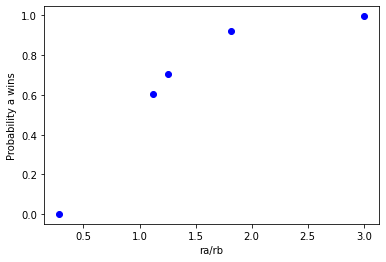

In [9]:
# Call the function to plot the figure here
plot_win_probabilities(read_abilities('test.csv'))

**Question 1e:** Complete the following function `win_probability_match(ra, rb, simulations, m)` to simulate `simulations` matches which are won by the first player to win `m` games, and returns an estimate of the probability that a player with ability `ra` will win such a match against a player of ability `rb`.

Provide code that works out the smallest value of `m` such that `win_probability_match(60, 40, simulations, m)` is at least `0.9`. 

_HINT: make sure you use an appropriate value for `simulations`._

**[Functionality: 5 marks]**

In [70]:
def win_probability_match(ra, rb, simulations, m, english=False):
    a_win_match = 0
    b_win_match = 0
    a_win_game_prob = win_probability_game(ra, rb, simulations, english)
    b_win_game_prob = win_probability_game(rb, ra, simulations, english)
    for i in range(simulations):
        a_win_game = 0
        b_win_game = 0
        while a_win_game < m and b_win_game < m:
            choice = random.choices(['a', 'b'], weights=[a_win_game_prob, b_win_game_prob], k=1)
            if choice == ['a']:
                a_win_game += 1
            else:
                b_win_game += 1
        if a_win_game > b_win_game:
            a_win_match += 1
        else: 
            b_win_match += 1
    return a_win_match / (a_win_match + b_win_match)
            
# Calculate lowest value of m here
probability = 0
m = 0
while probability < 0.9:
    m += 1
    probability = win_probability_match(60, 40, 1000, m)

print(m)

2


Question 2
==========

Complete the remaining template of a scientific report that uses the results of simulation (with suitable input data) to investigate whether English or PARS is the ``better`` scoring method for squash matches. 

You should clearly state any assumptions you make, and may add any number of code cells. Guidance for completing the markdown/text cells is given in the coursework specification. The word count of the remaining markdown/text cells must be at most 750.

Your investigation should consider the relative ability of the two players (i.e. `ra/rb`) as the _independent variable_ and include appropriate figures that show how your choice of relevant _dependent variable_ varies. Your results **must** cover at least 50 different values of `ra/rb`.

Some starting points you may consider:
- How _fair_ is the scoring method - does the better player usually win?
- Shorter matches are usually preferable (e.g. for television) - if you assume each rally in a match takes equal time, how long do matches typically last?
- What effect does the relative ability of the two players have?

**[Report: 7 marks; Achievement: 8 marks]**

## Problem

I am investigating which is the better scoring system for Squash out of English and Point-a-rally scoring (PARS). I will be measuring this by looking for which scoring method leads to the player with the greater ability winning more often. 
- The independant variable will be the relative ability of player a against player b (ra/rb)
- The dependant variable will be the probability that player a wins.

I expect to see the English scoring system to be more fair though the objective of this program is to prove this.

## Method

- I will read player abilities from the from the csv file that contains a minimum of 50 and put them into a list of tuples.
    - This will give me a minimum of 50 matches worth of points to plot onto a graph
    - These are the parameters I will be using, with players' abilities varying between 10 - 90
- For each method of scoring for each match:
    - I will work out `player a`'s relative ability against `player b` by calculating `ra / rb` (independant variable)
    - I will estimate the probability that `player a` wins using a suitable number of simulations (dependant variable)
        - Doing this by simulating a number of games and working out what proportion was won by `player a`
- I will then plot these values on the same graph for both scoring methods and evaluate which one is more fair as the better player wins more often.

## Assumptions

- The assumption that the probability of a player winning a point never varies and that it is always related to their and their oponents ability. In reality the probability of a specific point being won will vary depending on other factors like stress, tiredness and endurance. 
- The assumption that the result of previous points being won or lost, and the same with games, has no effect on the current point of games prospects. In reality the pressure of an important point or game can effect its outcome. 
- The assumption that ability does not vary between the two scoring methods. In reality one scoring method might favour a stronger server than the other.

## Results

I will set the variable `player_abilities` to the results read from `player_abilities.csv`:

In [32]:
player_abilities = read_abilities('player_abilities.csv')

I will create a function that takes in three arguments: relative abilities (x-axis), PARS probabilities (y-axis) and english probabilities (y-axis), and display a graph plotting them against eachother.

In [33]:
def plot_results(rel_abilities, pars_prob, english_prob):
    # Order the lists according to rel_abilities so that the lines will connect properly on the graph 
    pars_prob = [x for _, x in sorted(zip(rel_abilities, pars_prob))]
    english_prob = [x for _, x in sorted(zip(rel_abilities, english_prob))]
    rel_abilities = sorted(rel_abilities)
    
    # Plotting the graph
    plt.figure(figsize=(14, 8))
    plt.title('PARS and English scoring')
    plt.ylabel('Probability a wins')
    plt.xlabel('ra/rb')
    # Limit the graph to the x values of 0 - 2 as the other values do not give us any new information
    plt.xlim(0, 2)
    plt.plot(rel_abilities, pars_prob)
    plt.plot(rel_abilities, english_prob)
    plt.show()

Now I will loop through all the matches and work out the relative ability of `player a` in the game, and the probability that he will win in the PARS and English games.

In [34]:
# Initialise the variables
relative_abilities = []
pars_probabilities = []
english_probabilities = []
simulations = 2000
matches = 3

# Loop through every match in the csv file and set the values in the variables to the results calculated
for player_ability in player_abilities:
    a, b = player_ability
    relative_abilities.append(a / b)
    pars_probabilities.append(win_probability_match(a, b, simulations, matches))    
    english_probabilities.append(win_probability_match(a, b, simulations, matches, True))  

Now I will finally plot the result of the calculations. (This may take a second)

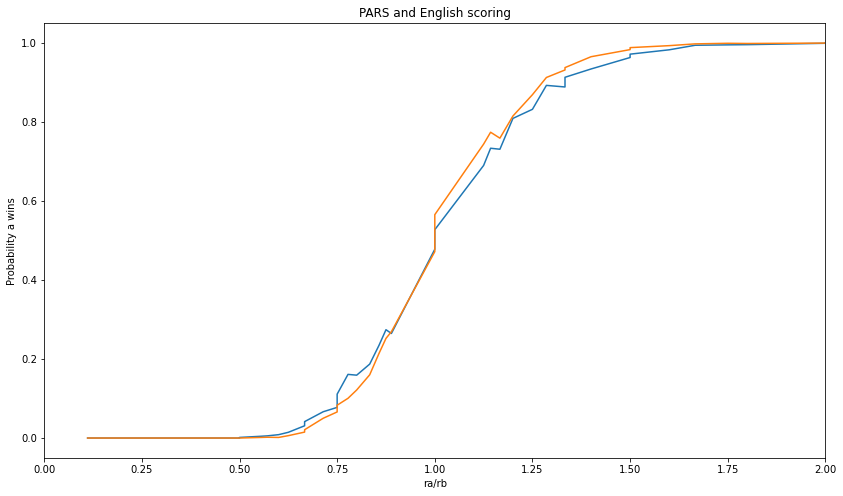

In [36]:
# Plot the results calculated
plot_results(relative_abilities, pars_probabilities, english_probabilities)

This is what the graph looks like if you set the simulation number to 10000 (This takes quite a while so I am just showing you an image).

<img src="./win_probability_graph.png" alt="Win probability graph" width="600">

Closer to the ends of the scale (at 0 and 2 on the x-axis) the two graphs do not differ much as the result is virtually certain that one player will win the match. Near x = 1 (the position where the two players have similar abilities) the two graphs are also very similar which makes sense too. Where the graphs differ is between these two points, where the ability are different enough for the scoring system to have an effect on the probability but not different enough for one person to be virtually guaranteed to win. We can see that below x = 1 the English method has a lower probability of winning and above x = 1 it has a higher one. This means that the English method is a more fair scoring method as the person with the higher ability is more likely to win.

## Conclusions

In conclusion, I believe that the results of the report show enough evidence to make the statement that the Enlish method of scoring is more fair than Point-a-rally scoring. This meaning that with the English scoring method, the player with the higher ability had a higher probability of winning the match than in PARS scoring.

Potential limitations of the problem could be traced back to the assumptions made earlier. The fact that in the world of sport you cannot just model someones ability as one number. One person might be good at one thing but not in another and depending on the oponent that play, even if on average they are on the same level, this could affect the outcome. To make the result more portraying of the real world it would be worth adding more values to a player such as their endurance (longer games may benefit or harm them) or how they handle pressure (PARS might be better due to the 2 points clear rule if they cant handle it).